Functions

In [14]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import array as arr

Putting the pixels in a 1D array

(array([2., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 5., 0., 0.,
        0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
        0., 3., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 3.]),
 array([0.  , 0.14, 0.28, 0.42, 0.56, 0.7 , 0.84, 0.98, 1.12, 1.26, 1.4 ,
        1.54, 1.68, 1.82, 1.96, 2.1 , 2.24, 2.38, 2.52, 2.66, 2.8 , 2.94,
        3.08, 3.22, 3.36, 3.5 , 3.64, 3.78, 3.92, 4.06, 4.2 , 4.34, 4.48,
        4.62, 4.76, 4.9 , 5.04, 5.18, 5.32, 5.46, 5.6 , 5.74, 5.88, 6.02,
        6.16, 6.3 , 6.44, 6.58, 6.72, 6.86, 7.  ]),
 <a list of 50 Patch objects>)

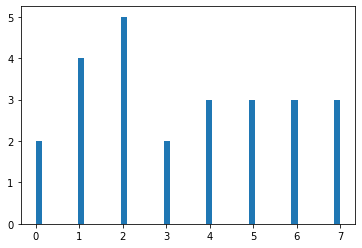

In [16]:
flat = arr.array('i', [3,7,6,2,0,2,4,6,1,1,4,7,2,5,4,3,0,6,2,1,5,7,5,1,2])
plt.hist(flat, bins=50)

In [17]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

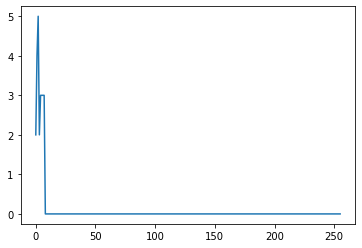

In [18]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

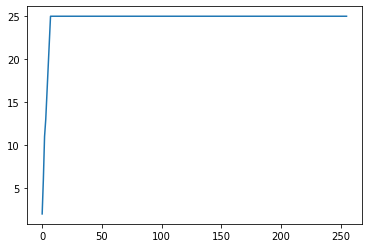

In [19]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [20]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

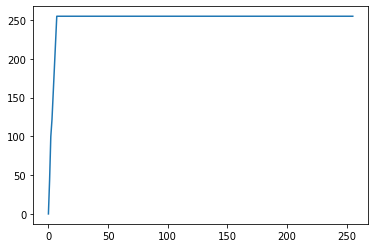

In [21]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

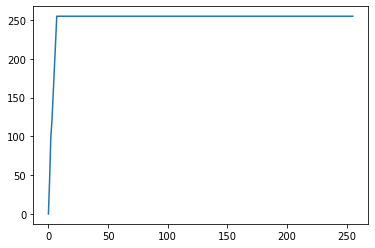

In [22]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([2., 4., 0., 5., 2., 0., 3., 3., 3., 3.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

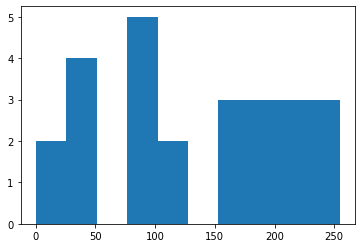

In [24]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=10)